# Mobile Price Classification using SVM

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as colors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

## Step 2: Load Dataset

In [ ]:
train_path = "/content/train.csv"
test_path = "/content/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_train.head()


,battery_power,blue,clock_speed,dual_sim,fc,five_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,four_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df_train.shape


(2000, 21)

In [ ]:
df_train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,five_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,four_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df_train.dtypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   five_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  four_g         2000 non-null   int64  
 18  touch_sc

## Step 3: Data Preprocessing

In [ ]:
df_categorical = df_train[['price_range', 'n_cores', 'blue', 'dual_sim', 'five_g', 'four_g', 'touch_screen', 'wifi']].astype(str)

unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

unique_values_df = pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})
print(unique_values_df)

df_numerical = df_train.drop(df_categorical.columns, axis=1)

print(df_numerical.describe().T.round(1))


              Number of Unique Values             Unique Values
price_range                         4              [1, 2, 3, 0]
n_cores                             8  [2, 3, 5, 6, 1, 8, 4, 7]
blue                                2                    [0, 1]
dual_sim                            2                    [0, 1]
five_g                              2                    [0, 1]
four_g                              2                    [0, 1]
touch_screen                        2                    [0, 1]
wifi                                2                    [1, 0]
                count    mean     std    min     25%     50%     75%     max
battery_power  2000.0  1238.5   439.4  501.0   851.8  1226.0  1615.2  1998.0
clock_speed    2000.0     1.5     0.8    0.5     0.7     1.5     2.2     3.0
fc             2000.0     4.3     4.3    0.0     1.0     3.0     7.0    19.0
int_memory     2000.0    32.0    18.1    2.0    16.0    32.0    48.0    64.0
m_dep          2000.0     0.5     0.3  

In [ ]:
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()
print(f'Missing values in training dataset:\n{missing_train}')
print(f'Missing values in testing dataset:\n{missing_test}')

df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())

df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

duplicates_train = df_train.duplicated().sum()
duplicates_test = df_test.duplicated().sum()
print(f'Duplicates in training dataset: {duplicates_train}')
print(f'Duplicates in testing dataset: {duplicates_test}')


Missing values in training dataset:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
five_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
four_g           0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Missing values in testing dataset:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
five_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
four_g           0
touch_screen     0
wifi             0
dtype: int64
Duplicates in training dataset: 0
Duplicates in testing dataset: 0


In [ ]:


categorical_features = ['price_range', 'n_cores', 'blue', 'dual_sim', 'five_g', 'four_g', 'touch_screen', 'wifi']
num_features = len(categorical_features)
cols = 3
rows = (num_features + cols - 1) // cols

fig = make_subplots(rows=rows, cols=cols, specs=[[{'type':'domain'}]*cols for _ in range(rows)], vertical_spacing=0.05, horizontal_spacing=0.01)

for i, feature in enumerate(categorical_features):
    value_counts = df_train[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    pie_chart = go.Pie(labels=labels, values=values, hole=0.6, textposition='inside', textinfo='percent+label', title=feature)
    fig.add_trace(pie_chart, row=(i // cols) + 1, col=(i % cols) + 1)

fig.update_layout(showlegend=False, height=1000, width=980, title_text="Distribution of Categorical Variables", title_x=0.5, title_y=0.95, title_font=dict(size=28, color='black'))
fig.show()

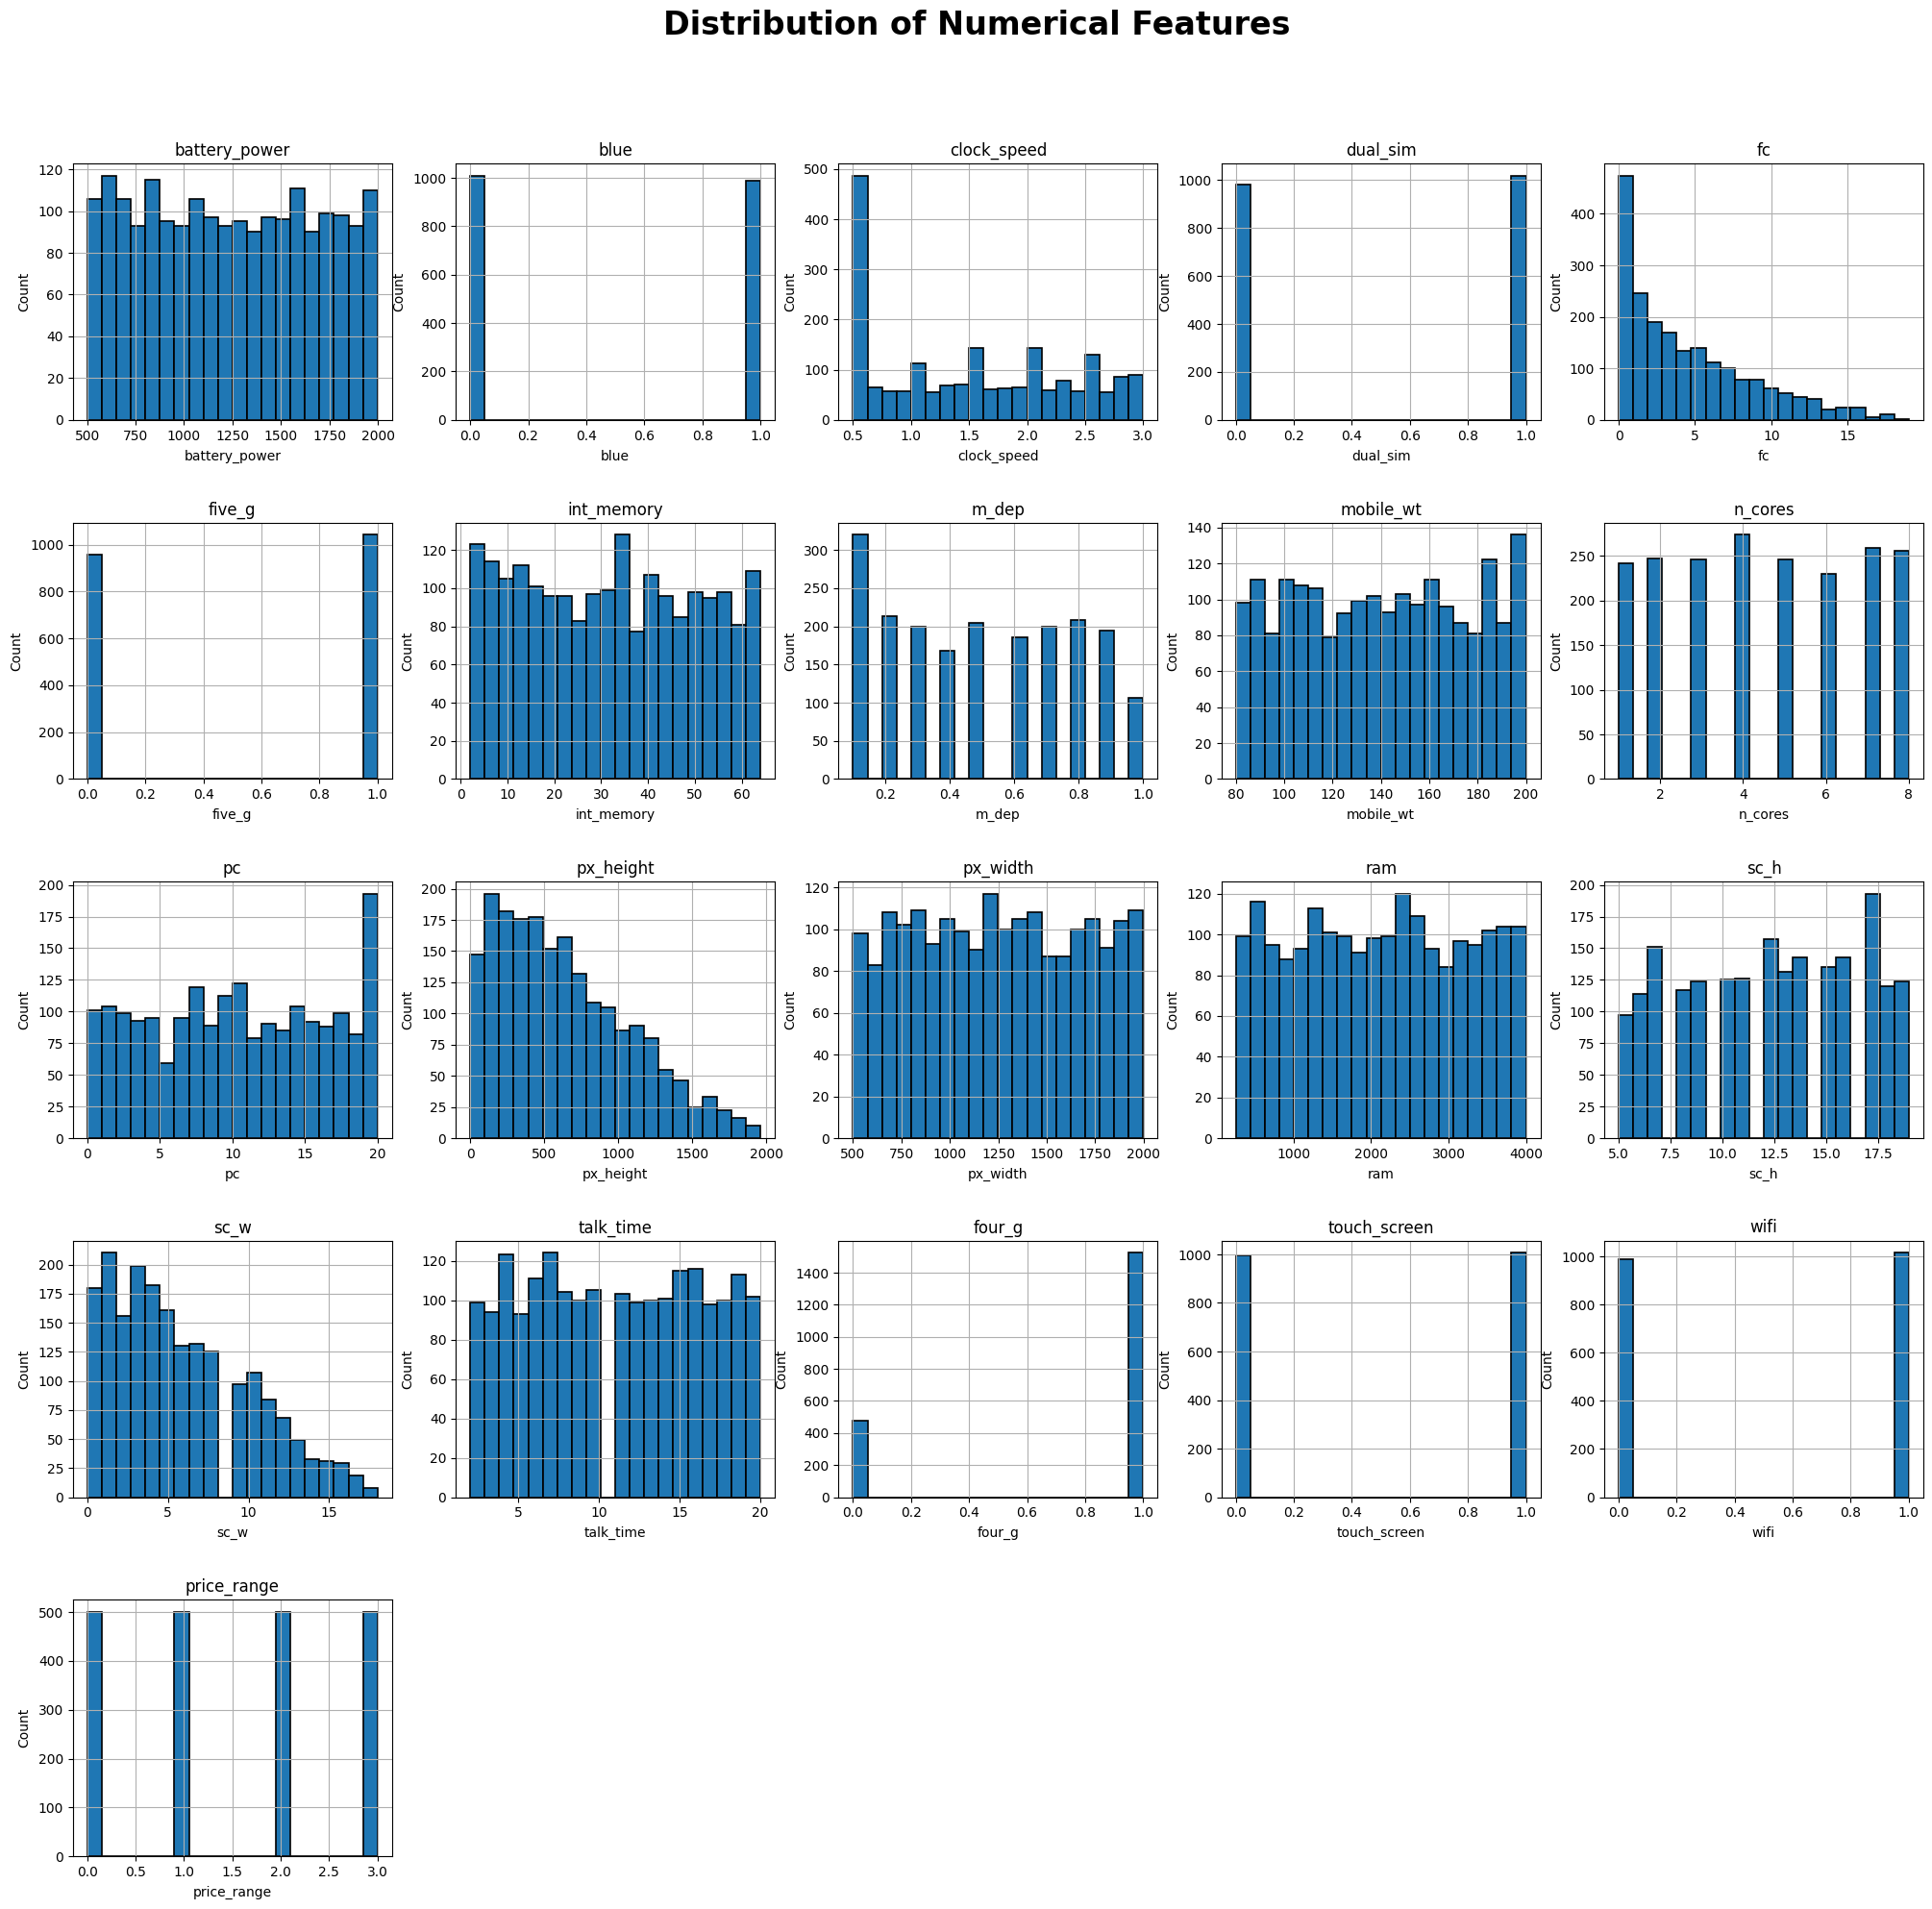

In [ ]:
df_train.hist(figsize=(20, 20), bins=20, edgecolor='black', linewidth=1.2)

plt.suptitle('Distribution of Numerical Features', fontsize=24, fontweight='bold')

plt.tight_layout()

plt.subplots_adjust(top=0.9, hspace=0.4)

for ax in plt.gcf().axes:

    ax.set_xlabel(ax.get_title(), labelpad=5)
    ax.set_ylabel('Count', labelpad=5)

plt.show()

In [ ]:
X = df_train.drop(columns=['price_range'])
y = df_train['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(df_test.drop(columns=['id'], errors='ignore'))

vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
         Features       VIF
0   battery_power  1.011231
1            blue  1.010993
2     clock_speed  1.008729
3        dual_sim  1.012303
4              fc  1.740449
5          five_g  1.520788
6      int_memory  1.009827
7           m_dep  1.008900
8       mobile_wt  1.007071
9         n_cores  1.014344
10             pc  1.742631
11      px_height  1.352836
12       px_width  1.346538
13            ram  1.011335
14           sc_h  1.394170
15           sc_w  1.390891
16      talk_time  1.015235
17         four_g  1.519760
18   touch_screen  1.010818
19           wifi  1.007793


<Axes: >

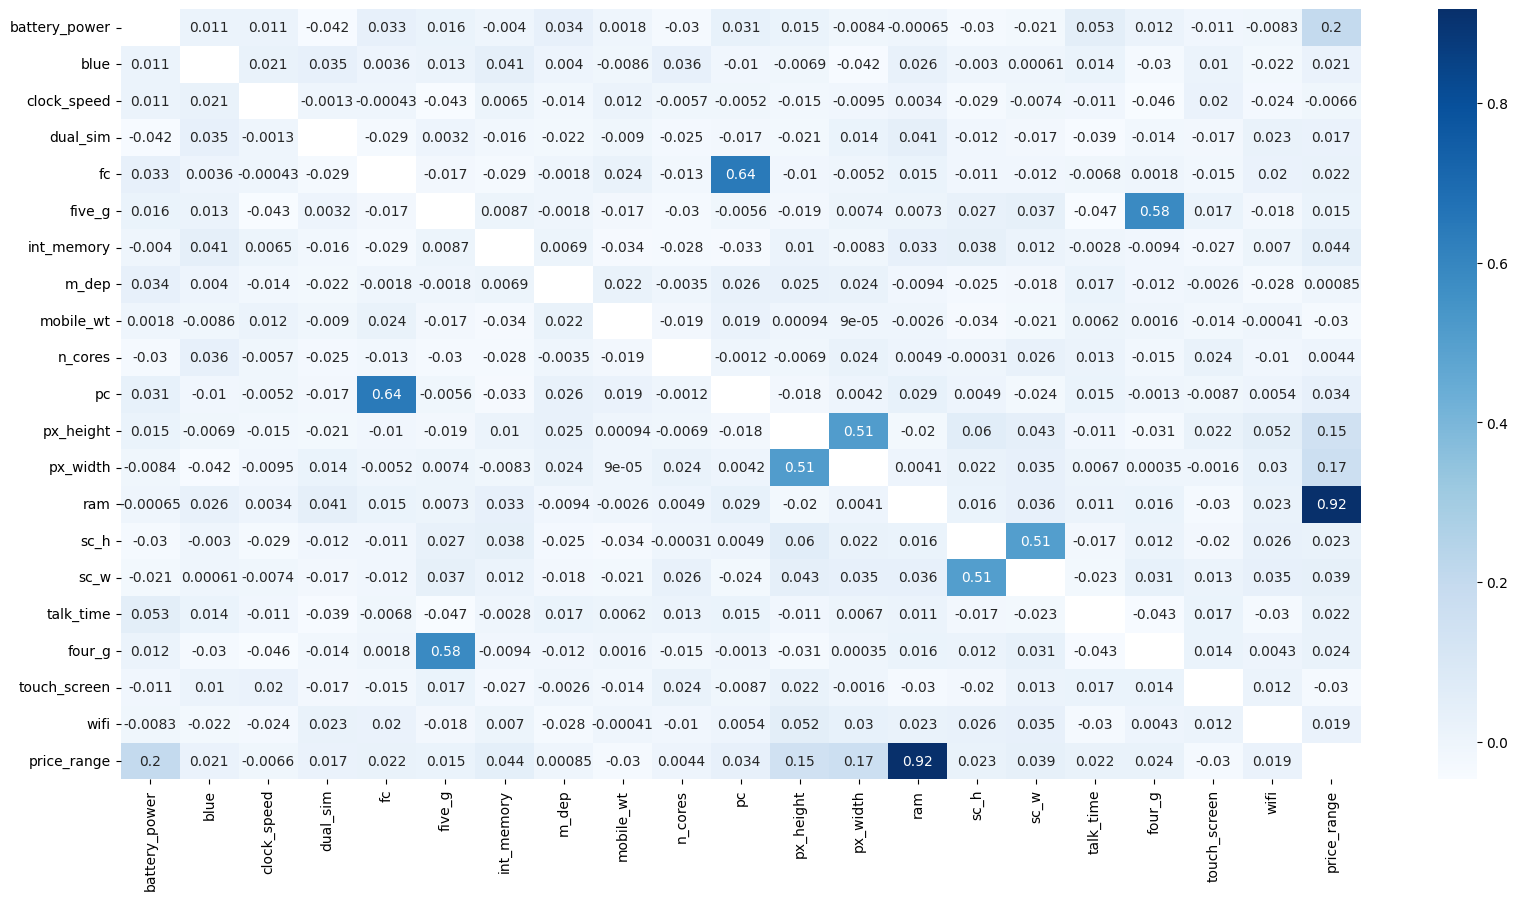

In [ ]:
corr = df_train.corr()
corr.replace(1, np.nan, inplace=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

In [ ]:
corr.abs()['price_range'].sort_values(ascending=False)

,price_range
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
touch_screen,0.030411
mobile_wt,0.030302
four_g,0.023611


## Step 4: SVM Model Training with GridSearchCV





In [ ]:

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid.best_params_}")
svm_model = grid.best_estimator_
svm_model.fit(X_train_scaled, y_train)


Best Parameters: {'C': 10, 'kernel': 'linear'}


SVC(C=10, kernel='linear')

## Step 5: Model Evaluation

Accuracy: 0.9750
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.97      0.96      0.96       100
           2       0.96      0.97      0.97       100
           3       0.98      0.99      0.99       100

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.97       400
weighted avg       0.98      0.97      0.97       400



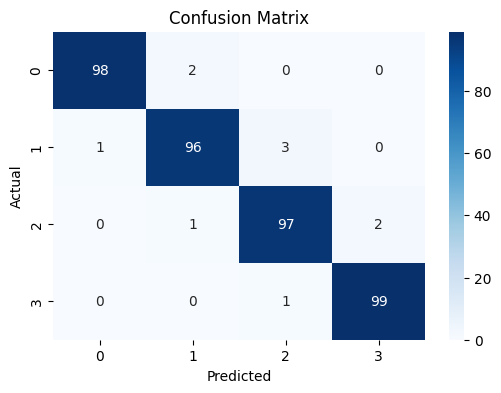

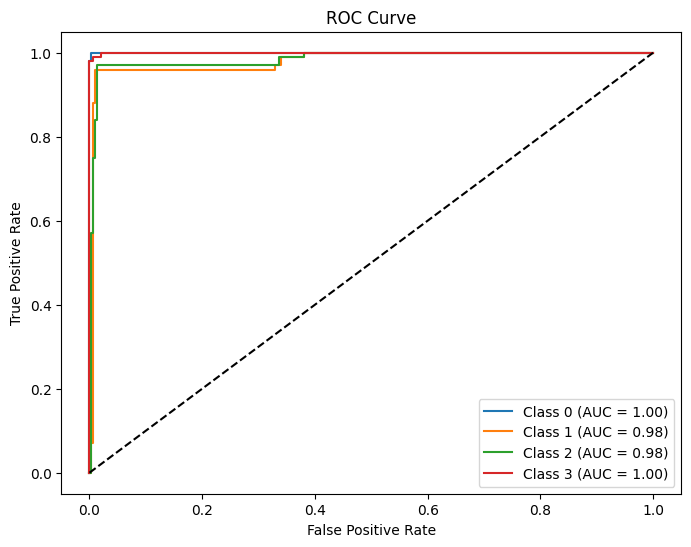

In [ ]:

y_pred = svm_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(8, 6))

for i in range(4):
    y_true_binary = (y_val == i).astype(int)

    y_score = svm_model.decision_function(X_val_scaled)[:, i]
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



## Step 6: Prediction on Test Data

In [ ]:
def predict_price(features):
    if len(features) != X_train.shape[1]:
        raise ValueError(f"Feature mismatch: Expected {X_train.shape[1]} features, got {len(features)}")

    features_scaled = scaler.transform([features])

    prediction = svm_model.predict(features_scaled)

    return prediction[0]


test_predictions = svm_model.predict(X_test_scaled)
df_test['predicted_price_range'] = test_predictions

df_test[['id', 'predicted_price_range']].to_csv("/content/test_predictions.csv", index=False)

print("Predictions saved to content/test_predictions.csv")
test_predictions_df = pd.Series(test_predictions)

print(test_predictions_df)

Predictions saved to content/test_predictions.csv
0      2
1      3
2      2
3      3
4      1
      ..
995    2
996    1
997    0
998    2
999    2
Length: 1000, dtype: int64


In [ ]:
sample_mobiles = {
    "Low-Cost": [
        1500,  # battery_power (mAh)
        0,  # blue (Bluetooth support: 0 = No, 1 = Yes)
        1.2,  # clock_speed (GHz)
        0,  # dual_sim (0 = No, 1 = Yes)
        1,  # fc (Front Camera MP)
        0,  # five_g (5G Support: 0 = No, 1 = Yes)
        4,  # int_memory (GB)
        0.3,  # m_dep (Mobile Depth in cm)
        80,  # mobile_wt (Weight in grams)
        1,  # n_cores (Number of Cores)
        3,  # pc (Primary Camera MP)
        360,  # px_height (Pixel Resolution Height)
        640,  # px_width (Pixel Resolution Width)
        500,  # ram (RAM in MB)
        5,  # sc_h (Screen Height in cm)
        2,  # sc_w (Screen Width in cm)
        3,  # talk_time (Hours)
        0,  # four_g (4G Support: 0 = No, 1 = Yes)
        0,  # touch_screen (0 = No, 1 = Yes)
        0   # wifi (WiFi Support: 0 = No, 1 = Yes)
    ],

    "Medium-Cost": [
        2000, 1, 2, 1, 4, 0, 8, 1.0, 120, 4, 8, 720, 1280, 1024, 15, 4, 8, 1, 1, 1
    ],

    "High-Cost": [
        3200, 1, 2.5, 0, 5, 0, 24, 1.8, 150, 5, 4, 900, 1600, 1500, 10, 8, 10, 1, 0, 1
    ],

    "Very High-Cost": [
        5040, 1, 4.0, 1, 12, 1, 128, 3.0, 300, 12, 50, 1440, 2560, 5000, 40, 16, 30, 1, 1, 1
    ]
}


print("\nFinal Model Performance Report:")
print(f"Validation Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("\nPredicted Price Range for Different Mobiles:")
for category, features in sample_mobiles.items():
    predicted_price_range = predict_price(features)
    print(f"{category} Mobile -> Predicted Price Range: {predicted_price_range}")


Final Model Performance Report:
Validation Accuracy: 0.9750
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.97      0.96      0.96       100
           2       0.96      0.97      0.97       100
           3       0.98      0.99      0.99       100

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.97       400
weighted avg       0.98      0.97      0.97       400


Predicted Price Range for Different Mobiles:
Low-Cost Mobile -> Predicted Price Range: 0
Medium-Cost Mobile -> Predicted Price Range: 1
High-Cost Mobile -> Predicted Price Range: 2
Very High-Cost Mobile -> Predicted Price Range: 3
